In [80]:
# Machine Learning Engineering HW #6
# Nicholas March
# 661848406

# Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras import optimizers
from tensorflow.python.keras.optimizers import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml, load_wine
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

Feature Data Shape: (178, 13)
Target Data Shape: (178,)

Transformed Feature Data Shape: (178, 2)
Explained Variance Ratio: [0.99809123 0.00173592]


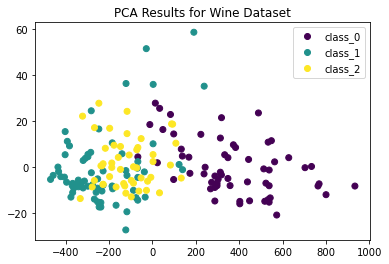

In [81]:
# Problem 1a, 1b

# Input data
data = load_wine()
x_data = data.data
y_data = data.target

# Print data array shapes
print("Feature Data Shape:",x_data.shape)
print("Target Data Shape:",y_data.shape)

# Perform PCA
model = PCA(n_components=2)
x_transformed = model.fit_transform(x_data)

# Print PCA results
print("\nTransformed Feature Data Shape:",x_transformed.shape)
print("Explained Variance Ratio:",model.explained_variance_ratio_)

# Plot PCA results
plt.scatter(x_transformed[:,0], x_transformed[:,1], c=y_data)
plt.legend(handles=plot.legend_elements()[0], labels=data.target_names.tolist())
plt.title("PCA Results for Wine Dataset")
plt.show()

Feature Training Data Shape: (106, 2)
Target Training Data Shape: (106,)
Feature Testing Data Shape: (72, 2)
Target Testing Data Shape: (72,)

SVM Accuracy: 0.77778


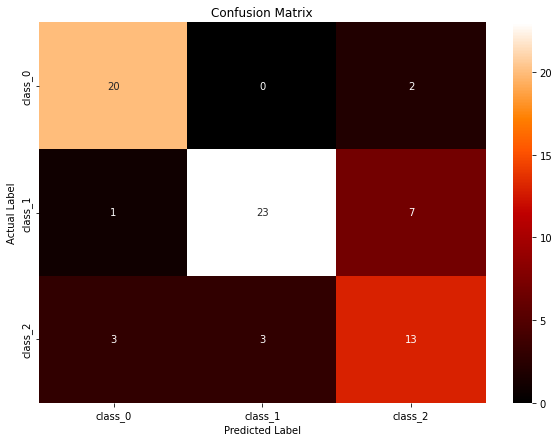

In [83]:
# Problem 1c

# Split PCA data into training and testing arrays
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y_data,
                                                    test_size=0.4,
                                                    random_state=0)

# Print data array shapes
print("Feature Training Data Shape:",x_train.shape)
print("Target Training Data Shape:",y_train.shape)
print("Feature Testing Data Shape:",x_test.shape)
print("Target Testing Data Shape:",y_test.shape)

# Define SVM classifier
clf_rbf = make_pipeline(StandardScaler(), SVC(kernel="rbf",
                                              gamma="scale",
                                              class_weight='balanced',
                                              C=2.0))
clf_rbf.fit(x_train, y_train)
rbf_pred = clf_rbf.predict(x_test)
rbf_cm = confusion_matrix(y_test, rbf_pred)
rbf_report = classification_report(y_test, rbf_pred)

# Make prediction
preds = clf_rbf.predict(x_test)
rbf_acc = accuracy_score(y_test, preds)
rbf_recall = recall_score(y_test, preds, average='macro')
rbf_prec = precision_score(y_test, preds, average='macro')

# Print accuracy
print("\nSVM Accuracy:", round(rbf_accuracy,5))

# Plot confusion matrix
plt.figure(figsize=(10,7))
ax = sns.heatmap(rbf_cm, annot=True, fmt="d", cmap="gist_heat")
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
ax.set_xticklabels(data.target_names.tolist())
ax.set_yticklabels(data.target_names.tolist(), va='center')
plt.show()

In [86]:
# Problem 1d

# Split original data into training and testing arrays
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.4,
                                                    random_state=0)

# Print data array shapes
print("Feature Training Data Shape:",x_train.shape)
print("Target Training Data Shape:",y_train.shape)
print("Feature Testing Data Shape:",x_test.shape)
print("Target Testing Data Shape:",y_test.shape)

# Define DT classifier
clf = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None)
clf.fit(x_train, y_train)

# Make prediction
preds = clf.predict(x_test)
dt_acc = accuracy_score(y_test, preds)
dt_recall = recall_score(y_test, preds, average='macro')
dt_prec = precision_score(y_test, preds, average='macro')

# Print comparison
print("\nDecision Tree vs. SVM Comparison:")
print(f"{'Metric':<15} {'Decision Tree':<15} {'SVM (RBF)':<15}")
print(f"{'Accuracy':<15} {dt_acc:<15.4f} {rbf_acc:<15.4f}")
print(f"{'Recall':<15} {dt_recall:<15.4f} {rbf_recall:<15.4f}")
print(f"{'Precision':<15} {dt_prec:<15.4f} {rbf_prec:<15.4f}")

Feature Training Data Shape: (106, 13)
Target Training Data Shape: (106,)
Feature Testing Data Shape: (72, 13)
Target Testing Data Shape: (72,)

Decision Tree vs. SVM Comparison:
Metric          Decision Tree   SVM (RBF)      
Accuracy        0.8889          0.7778         
Recall          0.8960          0.7784         
Precision       0.8869          0.7696         


As shown above, the decision tree outperformed the support vector machine model for all three metrics. This means that the predictive power of the decision tree given all 13 original features is greater than that of the support vector machine given the results of the principle component analysis.

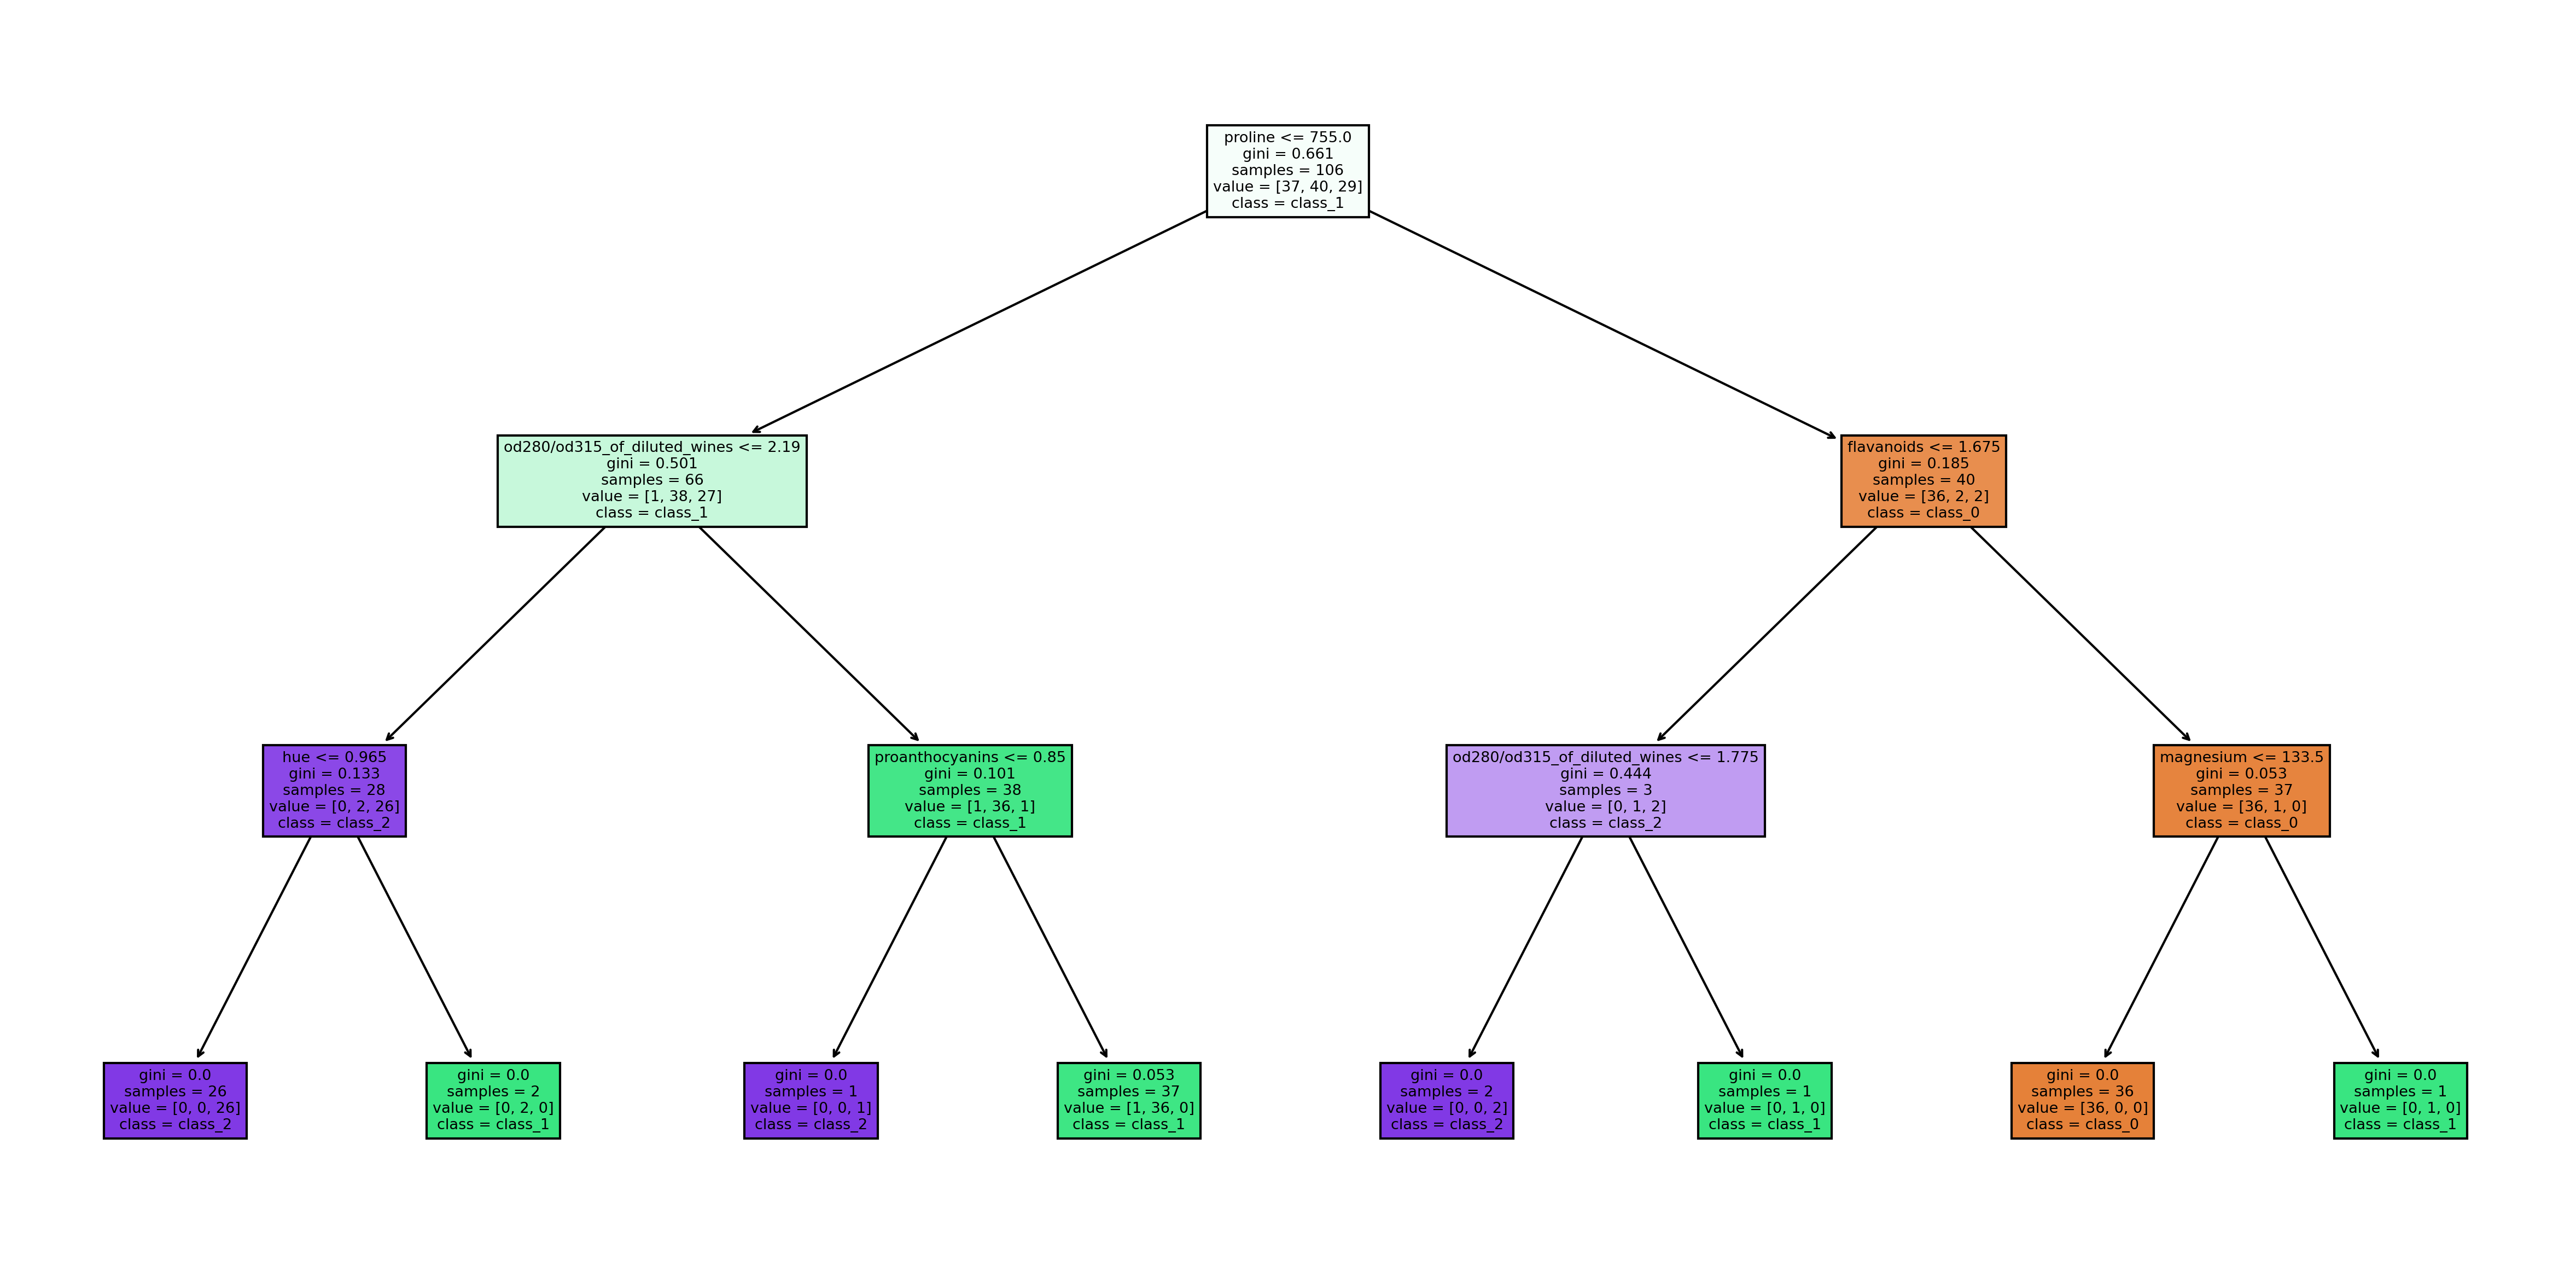

In [89]:
# Problem 1e

# Plot decision tree
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names.tolist())
plt.show()

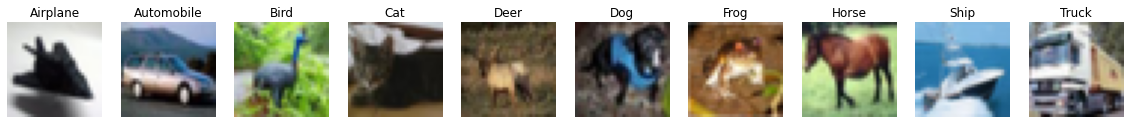

Feature Data Shape: (60000, 32, 32, 3)
Target Data Shape: (60000, 1)


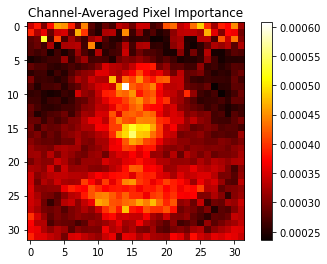

In [90]:
# Problem 2

# Input data and combine together
a, b = keras.datasets.cifar10.load_data()
x_data = np.concatenate((a[0],b[0]))
y_data = np.concatenate((a[1],b[1]))

# Plot CIFAR10 data
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
unique_classes = np.unique(y_data)
fig, axes = plt.subplots(1, len(unique_classes), figsize=(20, 2))
for ax, cls in zip(axes, unique_classes):
    idx = np.where(y_data == cls)[0][0]
    ax.imshow(x_data[idx])
    ax.set_title(class_names[cls])
    ax.axis('off')
plt.show()

# Print data array shapes
print("Feature Data Shape:",x_data.shape)
print("Target Data Shape:",y_data.shape)

# Define and fit classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0, n_jobs=-1)
rf_clf.fit(x_data.reshape((x_data.shape[0], -1)), y_data.ravel())
importances = rf_clf.feature_importances_.reshape((32, 32, 3))
importances_averaged = importances.mean(axis=2)

# Plot importance
plt.imshow(importances_averaged, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Channel-Averaged Pixel Importance")
plt.show()

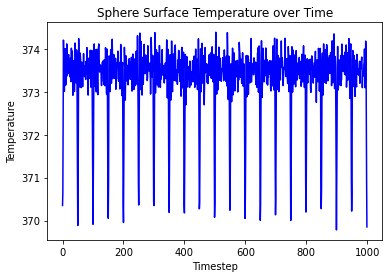

Feature Training Data Shape: (693, 10, 1)
Target Training Data Shape: (693, 1)
Feature Validation Data Shape: (198, 10, 1)
Target Validation Data Shape: (198, 1)
Feature Testing Data Shape: (99, 10, 1)
Target Testing Data Shape: (99, 1)

Test Set Mean Squared Error: 0.007


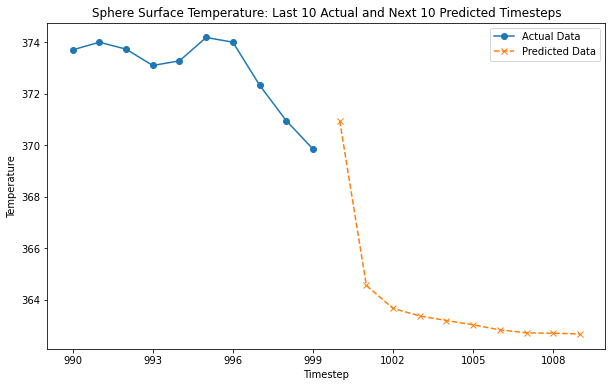

In [17]:
# Problem 3

# Read in data
temp_data = np.load("surface_temp.npy")

# Plot input data
plt.plot(temp_data, "b-")
plt.title("Sphere Surface Temperature over Time")
plt.xlabel("Timestep")
plt.ylabel("Temperature")
plt.show()

# Write function for grouping data
def time_series(data, series_size, num_predictions=1):
    x_data = []
    y_data = []
    for i in range(len(data)):
        if i+series_size+num_predictions <= len(data):
            x_data.append(data[i:i+series_size])
            y_data.append(data[i+series_size:i+series_size+num_predictions])
    return np.array(x_data), np.array(y_data)

# Execute grouping function and split data
x_data, y_data = time_series(temp_data, 10)
train_split = int(0.7 * len(x_data))
val_split = int(0.9 * len(x_data))
x_train, y_train = x_data[:train_split], y_data[:train_split]
x_valid, y_valid = x_data[train_split:val_split], y_data[train_split:val_split]
x_test, y_test = x_data[val_split:], y_data[val_split:]

# Scale and reshape data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))
x_valid_scaled = scaler.transform(x_valid.reshape(-1, 1))
x_test_scaled = scaler.transform(x_test.reshape(-1, 1))
x_train = x_train_scaled.reshape(x_train.shape[0], -1, 1)
x_valid = x_valid_scaled.reshape(x_valid.shape[0], -1, 1)
x_test = x_test_scaled.reshape(x_test.shape[0], -1, 1)
y_train_scaled = scaler.transform(y_train.reshape(-1, 1))
y_valid_scaled = scaler.transform(y_valid.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))
y_train = y_train_scaled.reshape(y_train.shape[0], -1)
y_valid = y_valid_scaled.reshape(y_valid.shape[0], -1)
y_test = y_test_scaled.reshape(y_test.shape[0], -1)

# Print data array shapes
print("Feature Training Data Shape:",x_train.shape)
print("Target Training Data Shape:",y_train.shape)
print("Feature Validation Data Shape:",x_valid.shape)
print("Target Validation Data Shape:",y_valid.shape)
print("Feature Testing Data Shape:",x_test.shape)
print("Target Testing Data Shape:",y_test.shape)

# Construct and fit model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(None, 1))) 
model.add(Dense(1)) 
opt = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_valid, y_valid), verbose=0)

# Evaluate mean squared error
mse_test = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Set Mean Squared Error: {mse_test:.3f}")

last_sequence = temp_data[-10:].reshape(1, 10, 1)  # Last 50 timesteps to start prediction
predictions = []

# Predict the next 10 timesteps
for i in range(10):
    # Use actual data for as long as possible, then switch to using predictions
    if i == 0:
        last_sequence = temp_data[-10:].reshape(1, 10, 1)
    else:
        # Use the last 9 actual data points and the 1 prediction to form the new sequence
        next_input = np.append(temp_data[-10+i:], predictions[:i])
        last_sequence = next_input.reshape(1, 10, 1)
    
    # Ensure last_sequence is properly scaled
    last_sequence_scaled = scaler.transform(last_sequence.reshape(-1, 1)).reshape(1, 10, 1)
    
    # Predict the next timestep
    next_step = model.predict(last_sequence_scaled, verbose=0)
    predictions.append(next_step.flatten()[0])

# Transform predictions back to original scale
predictions_scaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Prepare data for plotting
actual_data = temp_data[-10:]  # Last 10 actual timesteps
predicted_data = predictions_scaled  # Next 10 predicted timesteps
timesteps_actual = np.arange(len(temp_data) - 10, len(temp_data))
timesteps_predicted = np.arange(len(temp_data), len(temp_data) + 10)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(timesteps_actual, actual_data, label='Actual Data', marker='o')
plt.plot(timesteps_predicted, predicted_data, label='Predicted Data', marker='x', linestyle='--')
plt.title("Sphere Surface Temperature: Last 10 Actual and Next 10 Predicted Timesteps")
plt.xlabel("Timestep")
plt.ylabel("Temperature")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()